# LSTM Model

In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow

  Using cached matplotlib-3.10.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached contourpy-1.3.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (102 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google

/Users/guzzji/Desktop/spring-classes-2025/cs-330/IntroToAIProject/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0012
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 9.8595e-05
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 7.9942e-05
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 7.2147e-05
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 6.1755e-05
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 5.6871e-05
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 5.1058e-05
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 5.0631e-05
Epoch 9/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 4.9282e-05
Epoch 10/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 4.8049e-05
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


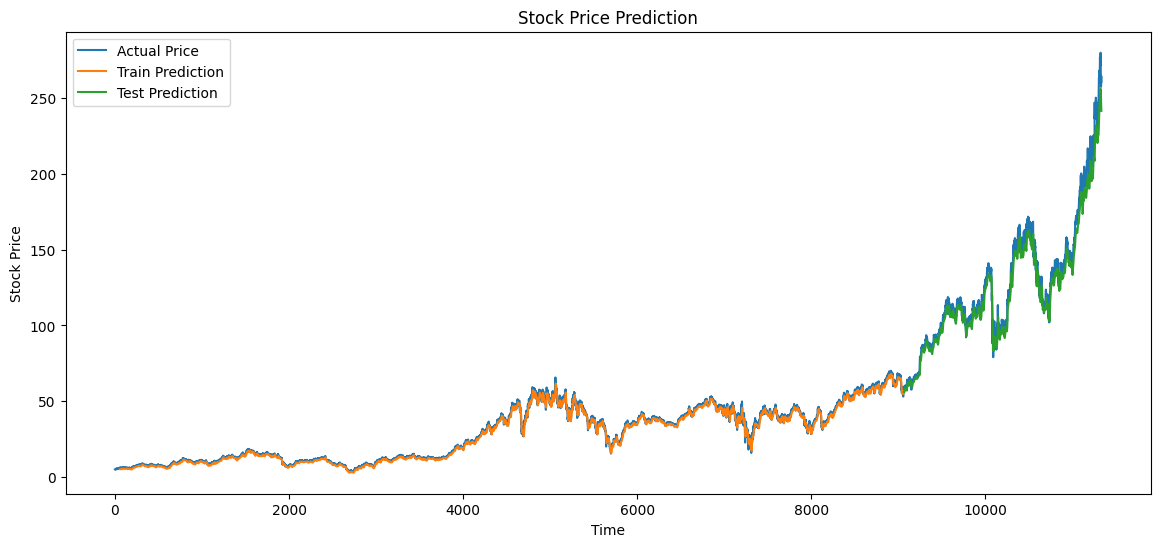

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Load your stock data
df = pd.read_csv("./JPStockPredict.csv")
data = df[['close']].values

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create train-test split
training_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - training_size
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size - 60:]  # Include past 60 points for LSTM window

# Prepare sequences
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i - time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Shift train predictions for plotting
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, 0] = train_predict[:, 0]

# Shift test predictions for plotting (fixed)
test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
start_idx = len(scaled_data) - len(test_predict)
test_plot[start_idx:, 0] = test_predict[:, 0]

# Plot actual vs predicted
plt.figure(figsize=(14,6))
plt.title('Stock Price Prediction')
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Price')
plt.plot(train_plot, label='Train Prediction')
plt.plot(test_plot, label='Test Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Accuracy-style score: how many predictions are within a % tolerance
tolerance_percent = 0.05  # 5% tolerance
correct = 0
total = len(y_test_actual)

for i in range(total):
    actual = y_test_actual[i][0]
    predicted = test_predict[i][0]
    tolerance = actual * tolerance_percent
    if abs(actual - predicted) <= tolerance:
        correct += 1

# --- Evaluation Metrics ---
mae = mean_absolute_error(y_test_actual, test_predict)
r2 = r2_score(y_test_actual, test_predict)
mse = mean_squared_error(y_test_actual, test_predict)
rmse = np.sqrt(mse)

print("\nModel Performance on Test Data")
print("===============================")
print(f"Model Accuracy-like Score: {correct} / {total} test predictions within ±{tolerance_percent*100:.0f}% of actual value.")
print(f"R² Score        : {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")



Model Performance on Test Data
Model Accuracy-like Score: 1586 / 2267 test predictions within ±5% of actual value.
R² Score        : 0.9724
Mean Absolute Error (MAE): 5.5117
Mean Squared Error (MSE): 50.9790
Root Mean Squared Error (RMSE): 7.1400
